### Import packages

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Download data
Fuel consumption data for over 1000 cars manufactured in 2014 and tested for CO2 emmision according to corresponding Canadian guidelines/standards.  
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
print('Download complete!')

--2019-02-01 03:41:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2019-02-01 03:41:42 (1.19 MB/s) - 'FuelConsumption.csv' saved [72629/72629]

Download complete!


### Read data

In [49]:
df = pd.read_csv("FuelConsumption.csv")
print('Dataframe has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Dataframe has 1067 rows and 13 columns


### Explore data
Lets get familirized with data before doing prediction

In [50]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [51]:
print('Dataframe columns:\n\n',df.columns.values, '\n\n')

Dataframe columns:

 ['MODELYEAR' 'MAKE' 'MODEL' 'VEHICLECLASS' 'ENGINESIZE' 'CYLINDERS'
 'TRANSMISSION' 'FUELTYPE' 'FUELCONSUMPTION_CITY' 'FUELCONSUMPTION_HWY'
 'FUELCONSUMPTION_COMB' 'FUELCONSUMPTION_COMB_MPG' 'CO2EMISSIONS'] 




In [56]:
# get the frequency of occurence of distinct models in the dataframe
dataTemp = df['MAKE'].value_counts()
# Convert to a dataframe
df2 = pd.DataFrame(data = dataTemp)
# set index:
df2 = df2.reset_index()
# rename columns
df2.rename(columns={'index':'MAKE', 'MAKE':'Count'}, inplace=True)
print('There are {} distinct models'.format(df2.shape[0]))
# display dataframe
df2.head(5)

There are 39 distinct models


,MAKE,Count
0,FORD,90
1,CHEVROLET,86
2,BMW,64
3,MERCEDES-BENZ,59
4,TOYOTA,49


#### Extract a sub-dataframe with selected features

In [85]:
df2 = df[['ENGINESIZE',
                    'CYLINDERS',
          'FUELTYPE',
          'VEHICLECLASS',
                    'FUELCONSUMPTION_COMB',
                    'CO2EMISSIONS']]
df2.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,VEHICLECLASS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,COMPACT,8.5,196
1,2.4,4,Z,COMPACT,9.6,221
2,1.5,4,Z,COMPACT,5.9,136
3,3.5,6,Z,SUV - SMALL,11.1,255
4,3.5,6,Z,SUV - SMALL,10.6,244


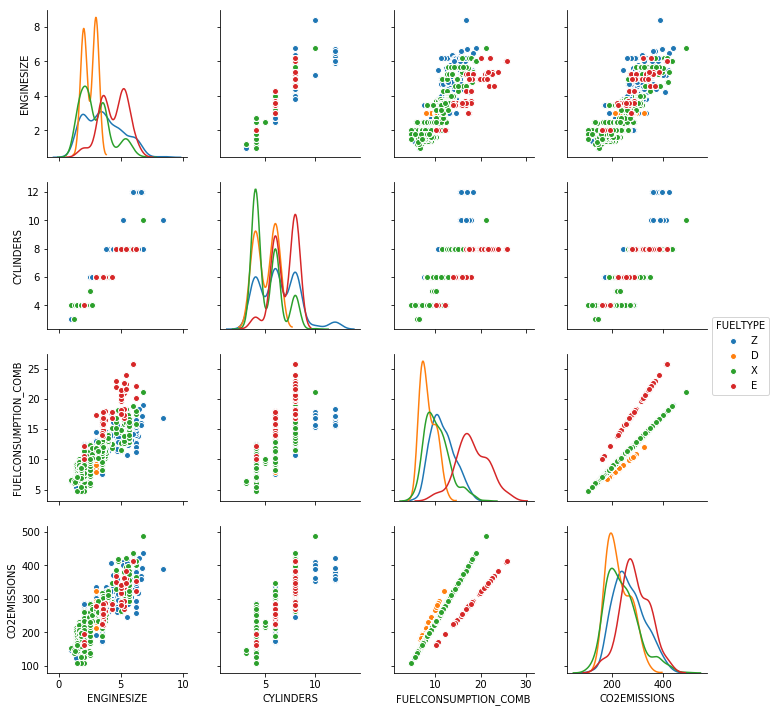

In [90]:
g = sns.pairplot(df2, hue='FUELTYPE', diag_kind="kde")